<img src="images/ScDo-Bandeau_Lingua_Technologies.png" style="width: 100%;float:center;"/>

<h1 style="font-size:250%;text-align:center">Prédiction de l'évolution temporelle de la</h1>
<h1 style="font-size:250%;text-align:center">pandémie du COVID-19</h1>
<h1 style="font-size:250%;text-align:center">modèles prédictifs</h1>
<h4 style="font-size:150%;text-align:center">par Claude COULOMBE</h4>
<h5 style="font-size:100%;text-align:center">PhD, scientifique de données, consultant Lingua Technologies</h5>


<img src="images/ScDo-pandas_logo.png" width=400 />

Pour contrer l'anxiété de la pandémie de COVID-19, rien de mieux que d'agir. J'ai donc préparé un petit carnet Web Python, prétexte pour un petit exercice d'exploration de données avec Pandas. Maintenant un petit carnet web IPython avec des modèles prédictifs. 

**Attention!** Je ne suis pas épidémiologiste! Il s'agit d'un exercice «amateur» réalisé comme un loisir scientifique. Je suis ouvert à la discussion pour améliorer mes modèles et pour le plaisir d'apprendre. Aussi ces modèles ne sont bons que pour faire des prédictions à court terme. Par exemple. pour prédire un cycle épidémique, un modèle ARIMA ou d'ajustement de courbes doit disposer d'au moins un cycle complet de données. 

Une autre approche consisterait à se baser sur le comportement de l'épidémie en Chine et ajuster les paramètres aux données locales. J'ignore toutefois si cela donnerait des résultats fiables. 

**Note:** Pour faire des prédictions plus complètes et à plus long terme, des simulations avec des modèles mathématiques à base d'équations différentielles seraient plus appropriées (https://bit.ly/2JEMe3g). D'ailleurs certains paramètres de ces modèles peuvent être extraits des données. Pour avoir une idée du fonctionnment de tels modèles, avec des simulations-jouets, allez voir les capsules vidéos de Grant Sanderson (3Blue1Brown), mon infographiste scientifique préféré: https://bit.ly/33Umjhe

<hr style="height:1px">

**Références:**

COVID-19: Time Series Analysis With ARIMA Modelling<br/>
https://bit.ly/2xK3GAI

Epidemiology and ARIMA model of positive-rate of influenza viruses among children in Wuhan, China: A nine-year retrospective study<br/>
https://bit.ly/3dJAfiJ

Application of the ARIMA model on the COVID-2019 epidemic dataset<br/>
https://bit.ly/2xMfFNR

Forecasting of COVID-19 Confirmed Cases in Different Countries with ARIMA Models<br/>
https://bit.ly/2UTRe9b

<hr style="height:1px">

<h3><i>« Prédire est difficile, surtout lorsqu’il s’agit de l’avenir »</i></h3><br/>
<div style="margin-left:450px">proverbe danois</div>

<hr style="height:1px">

### Importation des bibliothèques utilisées

In [144]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline


## Données

### Dépôt de données ouvertes du COVID-19 - John Hopkins University


https://github.com/CSSEGISandData/COVID-19

<img src="" style="width: 100%;float:center;"/>

**Note** : Les données contenues dans le répertoire DATA doivent être mise à jour régulièrement pour refléter l'évolution de la pandémie dans le temps. 


### Lecture des données

Nous nous intéressons au fichier `time_series_19-covid-Confirmed.csv` qui contient les données sur les cas confirmés de COVID-19

In [145]:
# Note - bonne pratique de postfixer les Dataframe par _df (Rappel: Python n'est pas typé)
series_chronologiques_COVID19_df = pd.read_csv('DATA/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',sep=',')


In [146]:
series_chronologiques_COVID19_df


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,NaN,Afghanistan,33.00000,65.000000,0,0,0,0,0,0,...,120,170,174,237,273,281,299,349,367,423
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,212,223,243,259,277,304,333,361,377,383
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,511,584,716,847,986,1171,1251,1320,1423,1468
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,334,370,376,390,428,439,466,501,525,545
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,7,7,7,8,8,8,10,14,16,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Falkland Islands (Malvinas),United Kingdom,-51.79630,-59.523600,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,2
259,Saint Pierre and Miquelon,France,46.88520,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
260,NaN,South Sudan,6.87700,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2
261,NaN,Western Sahara,24.21550,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,4,4


### Retrait d'attributs «superflus»

Puisque nous nous intéressons à l'évolution du nombre de malades dans le temps, certains attributs (colonnes du tableau de données) sont superflus ou «inutiles» et alourdissent notre analyse.

Ci-dessous une liste d'attributs à retirer:

In [147]:
attributs_a_retirer = ["Lat","Long"]


Retirer les attributs «superflus» avec la fonction `.drop()`

In [148]:
series_chronologiques_COVID19_df = series_chronologiques_COVID19_df.drop(attributs_a_retirer,axis='columns')


In [149]:
series_chronologiques_COVID19_df.head()


,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,120,170,174,237,273,281,299,349,367,423
1,NaN,Albania,0,0,0,0,0,0,0,0,...,212,223,243,259,277,304,333,361,377,383
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,511,584,716,847,986,1171,1251,1320,1423,1468
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,334,370,376,390,428,439,466,501,525,545
4,NaN,Angola,0,0,0,0,0,0,0,0,...,7,7,7,8,8,8,10,14,16,17


#### Maintenant, examinons les données pour les différentes provinces canadiennes.

In [150]:
series_chronologiques_COVID19_df[series_chronologiques_COVID19_df['Country/Region']=="Canada"]


,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
35,Alberta,Canada,0,0,0,0,0,0,0,0,...,621,661,690,754,969,969,1075,1181,1250,1373
36,British Columbia,Canada,0,0,0,0,0,0,1,1,...,884,970,1013,1013,1121,1174,1203,1203,1266,1266
37,Grand Princess,Canada,0,0,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
38,Manitoba,Canada,0,0,0,0,0,0,0,0,...,72,96,103,127,167,182,182,203,203,217
39,New Brunswick,Canada,0,0,0,0,0,0,0,0,...,66,68,70,81,91,91,91,98,103,105
40,Newfoundland and Labrador,Canada,0,0,0,0,0,0,0,0,...,135,148,152,175,183,195,195,217,226,228
41,Nova Scotia,Canada,0,0,0,0,0,0,0,0,...,122,127,147,173,193,207,236,262,293,310
42,Ontario,Canada,0,0,0,0,1,1,1,1,...,1355,1706,1966,2392,2793,3255,3630,4354,4347,4726
43,Prince Edward Island,Canada,0,0,0,0,0,0,0,0,...,11,18,21,21,22,22,22,22,22,22
44,Quebec,Canada,0,0,0,0,0,0,0,0,...,2840,3430,4162,4611,5518,6101,6101,7944,8580,9340


### Création d'une entrée supplémentaire spécifique pour le Québec (avec accent aigu) 

In [151]:
quebec_df = series_chronologiques_COVID19_df[(series_chronologiques_COVID19_df['Country/Region']=="Canada") & 
                                (series_chronologiques_COVID19_df['Province/State']=="Quebec")]

quebec_df.loc[44,'Country/Region'] = 'Québec'
quebec_df.loc[44,'Province/State'] = np.nan

series_chronologiques_COVID19_df = series_chronologiques_COVID19_df.append(quebec_df , ignore_index=True)
series_chronologiques_COVID19_df


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,120,170,174,237,273,281,299,349,367,423
1,NaN,Albania,0,0,0,0,0,0,0,0,...,212,223,243,259,277,304,333,361,377,383
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,511,584,716,847,986,1171,1251,1320,1423,1468
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,334,370,376,390,428,439,466,501,525,545
4,NaN,Angola,0,0,0,0,0,0,0,0,...,7,7,7,8,8,8,10,14,16,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
260,NaN,South Sudan,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2
261,NaN,Western Sahara,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,4,4
262,NaN,Sao Tome and Principe,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,4


### Regroupement des données des états et provinces
**Note** : Pour avoir un total par pays, nous allons regrouper les états et les provinces d'un même pays. Utilisaton des fonctions `.groupby()` et `.sum()`. Aussi `.reset_index()`

In [152]:
series_chronologiques_COVID19_df = series_chronologiques_COVID19_df.groupby(['Country/Region']).sum().reset_index()


Vérifions que le regroupement est bien effectué, avec les données sur le Canada.

In [153]:
series_chronologiques_COVID19_df[series_chronologiques_COVID19_df['Country/Region']=="Canada"]


,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
32,Canada,0,0,0,0,1,1,2,2,2,...,6280,7398,8527,9560,11284,12437,12978,15756,16563,17872


In [154]:
series = series_chronologiques_COVID19_df[series_chronologiques_COVID19_df['Country/Region']=="Québec"]
series


,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
137,Québec,0,0,0,0,0,0,0,0,0,...,2840,3430,4162,4611,5518,6101,6101,7944,8580,9340


In [155]:
# Correction d'une erreur dans les données du 4 avril 2020
series_chronologiques_COVID19_df.loc[137,'4/4/20']=6997
series_chronologiques_COVID19_df[series_chronologiques_COVID19_df['Country/Region']=="Québec"]


,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
137,Québec,0,0,0,0,0,0,0,0,0,...,2840,3430,4162,4611,5518,6101,6997,7944,8580,9340


# Modèles prédictifs



## L'évolution de l'épidémie au Québec
Pour des raisons évidente d'intérêt, je me concentrerai sur la prévision de l'évolution de l'épidémie au Québec

Rappel de la série chonologique 

In [156]:
print(list(series))


['Country/Region', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20']


In [157]:
def parser(x):
    return pd.datetime.strptime(x, '%m/%d/%y')

series_raw = series_chronologiques_COVID19_df[series_chronologiques_COVID19_df['Country/Region']=='Québec']
print(series_raw)
dates_list = [parser(x) for x in list(series_raw.columns[1:])]
values_list = list((series_raw.values)[0][1:])
# Ici au besoin, on peut ajouter manuellement un nouveau point de données
# lignes commentées
# values_list += [6101]
# dates_list += [parser('4/3/20')]                     
print("-"*90)
print("values_list[-10:]:")
print(list(values_list[-10:]))
print("*"*90)
print("dates_list[-10:]:")
print(dates_list[-10:])
print("-"*90)
series = pd.Series(values_list,index=dates_list)
series.index.name = 'date'
print("series[-10:]:")
print(list(series)[-10:])
print("-"*90)
print("series.index[-10:]:")
print(list(series.index)[-10:])
print("*"*90)


    Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
137         Québec        0        0        0        0        0        0   

     1/28/20  1/29/20  1/30/20  ...  3/29/20  3/30/20  3/31/20  4/1/20  \
137        0        0        0  ...     2840     3430     4162    4611   

     4/2/20  4/3/20  4/4/20  4/5/20  4/6/20  4/7/20  
137    5518    6101    6997    7944    8580    9340  

[1 rows x 78 columns]
------------------------------------------------------------------------------------------
values_list[-10:]:
[2840, 3430, 4162, 4611, 5518, 6101, 6997, 7944, 8580, 9340]
******************************************************************************************
dates_list[-10:]:
[datetime.datetime(2020, 3, 29, 0, 0), datetime.datetime(2020, 3, 30, 0, 0), datetime.datetime(2020, 3, 31, 0, 0), datetime.datetime(2020, 4, 1, 0, 0), datetime.datetime(2020, 4, 2, 0, 0), datetime.datetime(2020, 4, 3, 0, 0), datetime.datetime(2020, 4, 4, 0, 0), datetime.datetime(2020, 

### Affichage de la progression temporelle du nombre de malades confirmés

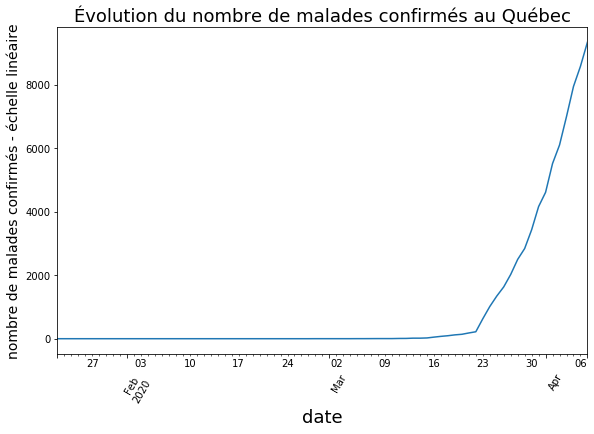

In [158]:
nombre_dor = 1.618
hauteur = 12
longueur = int(nombre_dor * hauteur)

plt.figure(figsize=(longueur/2,hauteur/2))
series.plot()
plt.title("Évolution du nombre de malades confirmés au Québec",fontsize=18)
plt.xlabel("date",fontsize=18)
plt.ylabel("nombre de malades confirmés - échelle linéaire",fontsize=14)
xticks(rotation=60)
plt.show()


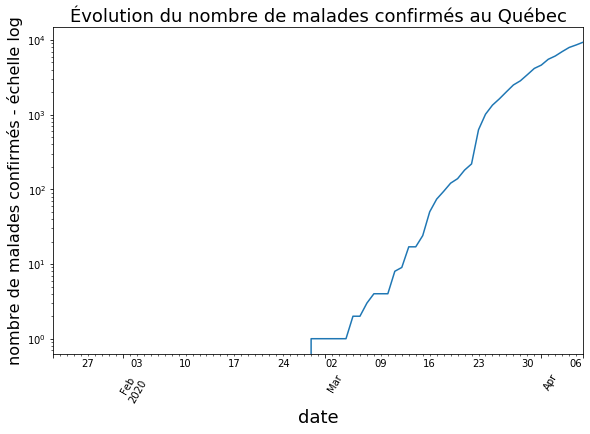

In [159]:
fig, ax = plt.subplots(figsize=(longueur/2,hauteur/2))
xticks(rotation=60)
ax.set_yscale('log')
series.plot()
plt.title("Évolution du nombre de malades confirmés au Québec",fontsize=18)
plt.xlabel("date",fontsize=18)
plt.ylabel("nombre de malades confirmés - échelle log",fontsize=16)
xticks(rotation=60)
plt.show()


 ## Modèle simple basé sur une régression et une fonction exponentielle

### Modéliser avec une fonction exponentielle de forme $a e^{bx}+c$ avec la fonction <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html">`scipy.optimize.curve_fit`</a>

[ 5.53659061e+01  1.34287801e-01 -3.21837478e+02]


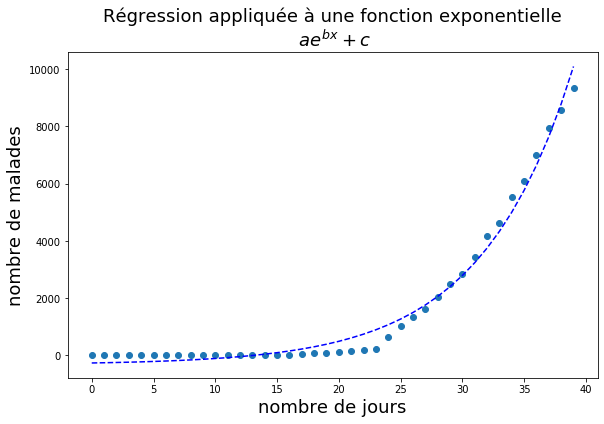

In [160]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

y_data = np.array([y for y in series.values if y > 0])
x_data = np.array([x for x in range(len(y_data))])

def func(x, a, b, c):
    return a * np.exp(b * x) + c

popt, pcov = curve_fit(func, x_data, y_data)
print(popt)

plt.figure(figsize=(longueur/2,hauteur/2))
plt.title("Régression appliquée à une fonction exponentielle\n $a e^{bx}+c$",fontsize=18)
plt.xlabel("nombre de jours",fontsize=18)
plt.ylabel("nombre de malades",fontsize=18)

plt.scatter(x_data, y_data)

_ = plt.plot(x_data, func(x_data, *popt), 'b--',
             label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.show()


In [161]:
def generate_xdata_predictions(x_data,n_predictions):
    longueur_x_data = len(x_data)    
    return [nouv_x for nouv_x in range(longueur_x_data,longueur_x_data+n_predictions)]
    
n_predictions = 3
x_data_list_extended = x_data.tolist() + generate_xdata_predictions(x_data,n_predictions)
x_data_extended = np.array(x_data_list_extended)
print(list(x_data_extended))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]


------------------------------------------------------------------------------------------
Vraies valeurs:
x=0, y=1
x=1, y=1
x=2, y=1
x=3, y=1
x=4, y=1
x=5, y=1
x=6, y=2
x=7, y=2
x=8, y=3
x=9, y=4
x=10, y=4
x=11, y=4
x=12, y=8
x=13, y=9
x=14, y=17
x=15, y=17
x=16, y=24
x=17, y=50
x=18, y=74
x=19, y=94
x=20, y=121
x=21, y=139
x=22, y=181
x=23, y=219
x=24, y=628
x=25, y=1013
x=26, y=1342
x=27, y=1632
x=28, y=2024
x=29, y=2498
x=30, y=2840
x=31, y=3430
x=32, y=4162
x=33, y=4611
x=34, y=5518
x=35, y=6101
x=36, y=6997
x=37, y=7944
x=38, y=8580
x=39, y=9340
------------------------------------------------------------------------------------------


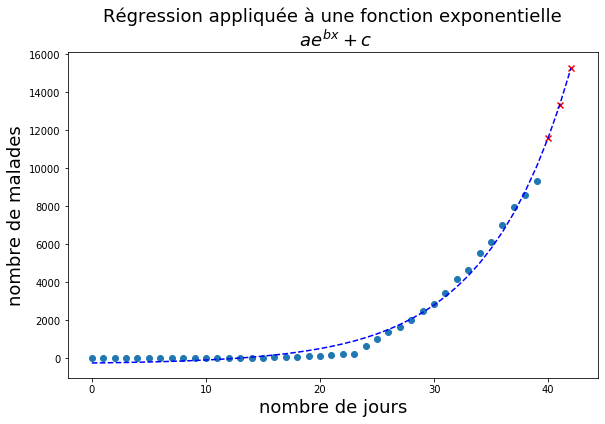

------------------------------------------------------------------------------------------
Prédictions:
x=40, y=11592
x=41, y=13304
x=42, y=15262
------------------------------------------------------------------------------------------


In [162]:
plt.figure(figsize=(longueur/2,hauteur/2))
plt.title("Régression appliquée à une fonction exponentielle\n $a e^{bx}+c$",fontsize=18)
plt.xlabel("nombre de jours",fontsize=18)
plt.ylabel("nombre de malades",fontsize=18)

predictions = func(x_data_extended, *popt)

plt.scatter(x_data, y_data)

print("-"*90)
print("Vraies valeurs:")
for index in range(len(y_data)):
    print('x=%i, y=%i' % (index,y_data[index]))
print("-"*90)

plt.scatter(x_data_extended[-n_predictions:], predictions[-n_predictions:],marker="x",color="r")

_ = plt.plot(x_data_extended, predictions, 'b--',
             label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.show()

print("-"*90)
print("Prédictions:")
for index in range(len(x_data),len(x_data_extended)):
    print('x=%i, y=%i' % (index,predictions[index]))
print("-"*90)


In [163]:
prediction_regNonLin_exp = int(predictions[len(x_data)])
prediction_regNonLin_exp


11592

## Modèle ARIMA

Une méthode statistique populaire pour la prévision des séries chronologiques est le modèle ARIMA, un acronyme qui signifie AutoRegressive Integrated Moving Average, en français modèle de moyenne mobile autorégressive. Il s'agit d'une classe de modèle qui capture une suite de différentes structures temporelles dans les données d'une série chronologique. 

Trois hyperparamètres contrôlent l'algorithme ARIMA 

* p: l'ordre du modèle autorégressif (correspond au nombre de périodes antérieuses considérées)
* d: le degré de différenciation des observations brutes (soustraction d'une observation au temps t à une observation à la période de temps précédente t-1) afin de rendre la série chronologique stationnaire
* q: l'ordre de la moyenne mobile (dépendance entre une observation et l'erreur résiduelle d'une moyenne mobile apppliquée aux observations antérieures) 

Référence : 

* https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average

* https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/


### Autocorrélation
Nous pouvons calculer la corrélation pour les observations de séries chronologiques avec des observations avec des périodes de temps précédentes, appelés périodes antérieures (en anglais, lag). Étant donné que la corrélation des observations de la série chronologique est calculée avec des valeurs de la même série à des périodes antérieures, cela s'appelle une autocorrélation, (en anglais. Autocorrelation Function, ACF).

Ci-dessous, calcul et affichage de l'autocorrélation avec la fonction `.autocorrelation_plot()` de la bibliothèque Pandas.

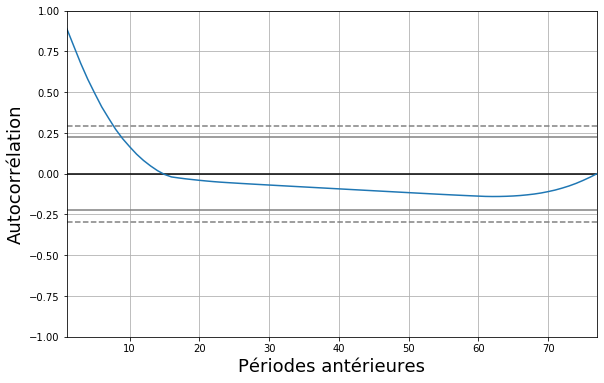

In [164]:
from pandas import read_csv
from pandas import datetime
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(longueur/2,hauteur/2))
autocorrelation_plot(series)
plt.xlabel(u'Périodes antérieures',fontsize=18)
plt.ylabel(u'Autocorrélation',fontsize=18)
plt.show()


Le même calcul et affichage de l'autocorrélation avec la fonction `.plot_acf()` de la bibliothèque statsmodels.

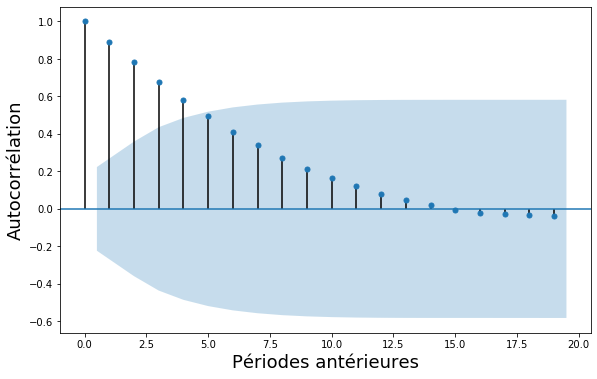

In [165]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(longueur/2,hauteur/2))
plot_acf(series,title='',ax=ax)
plt.xlabel(u'Périodes antérieures',fontsize=18)
plt.ylabel(u'Autocorrélation',fontsize=18)
plt.show()


### Autocorrélation partielle
Une autocorrélation partielle (en anglais. Partial Autocorrelation Function, PACF) est un résumé de la relation entre une observation dans une série chronologique avec des observations à des périodes antérieures en supprimant les relations des observations intermédiaires. Utilisation de avec la fonction `.plot_pacf()` de la bibliothèque statsmodels.

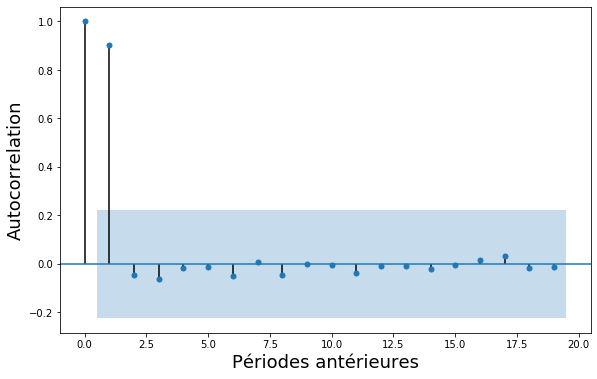

In [166]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(longueur/2,hauteur/2))
plot_pacf(series,title='',ax=ax)
plt.xlabel(u'Périodes antérieures',fontsize=18)
plt.ylabel(u'Autocorrelation',fontsize=18)
plt.show()


### Auto ARIMA

Auto ARIMA calcule les meilleurs modèles ARIMA à partir des données et de contraintes sur les hyperparamètres (p,d,q) de ARIMA selon diférents critères comme le <a href="https://fr.wikipedia.org/wiki/Crit%C3%A8re_d%27information_d%27Akaike">critère d'information d'Akaike</a> (Akaike information criterion ou AIC) 

Installer la bibliothèque Python auto_arima

    > sudo pip3 install pyramid-arima

Documentation: https://alkaline-ml.com/pmdarima/0.9.0/tips_and_tricks.html#tips-and-tricks

Prise en main rapide: https://alkaline-ml.com/pmdarima/0.9.0/quickstart.html


In [167]:
import pyramid as pm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Entraîner auto-ARIMA
meilleurs_ARIMA = pm.auto_arima(series, start_p=1, start_q=1,
                             max_p=3, max_q=3, m=100,
                             start_P=0, seasonal=False,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # pas de message d'erreur sur 
                             suppress_warnings=True, # pas de message de non convergence
                             stepwise=True)  # calcul pas à pas
meilleurs_ARIMA.summary()


Fit ARIMA: order=(1, 1, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0); AIC=1059.596, BIC=1064.258, Fit time=0.004 seconds
Fit ARIMA: order=(1, 1, 0); AIC=932.688, BIC=939.680, Fit time=0.052 seconds
Fit ARIMA: order=(0, 1, 1); AIC=1006.971, BIC=1013.963, Fit time=0.043 seconds
Fit ARIMA: order=(2, 1, 0); AIC=910.361, BIC=919.684, Fit time=0.183 seconds
Fit ARIMA: order=(2, 1, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 0); AIC=907.817, BIC=919.471, Fit time=0.295 seconds
Total fit time: 0.625 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   76
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -448.908
Method:                       css-mle   S.D. of innovations             87.025
Date:                Wed, 08 Apr 2020   AIC                            907.817
Time:                        01:07:36   BIC                            919.471
Sample:                             1   HQIC                           912.474
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        310.8560    312.219      0.996      0.319    -301.083     922.795
ar.L1.D.y      0.3170      0.111      2.864      0.004       0.100       0.534
ar.L2.D.y      0.4110      0.110      3.746      0.000       0.196       0.626
ar.L3.D.y      0.2561      0.118      2.178      0.029       0.026       0.487
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0083           -0.0000j            1.0083           -0.0000
AR.2           -1.3066           -1.4717j            1.9680           -0.3656
AR.3           -1.3066           +1.4717j            1.9680            0.3656
-----------------------------------------------------------------------------
"""

### Entraînement des deux meilleurs modèles ARIMA

Le critère de sélection selon le <a href="https://fr.wikipedia.org/wiki/Crit%C3%A8re_d%27information_d%27Akaike">critère d'information d'Akaike</a> (Akaike information criterion ou AIC). On ne conserve que les deux ou trois meilleurs modèles ARIMAselon ce critère qui doit être minimisé.

Certains modèles ARIMA sont retirés car ils ne convergent pas (`LinAlgError: SVD did not converge`) ou parce que le modèle n'est pas stationnaire.

In [168]:
meilleurs_ARIMA = [
    (1, 1, 0),
    (2, 1, 0),
    (3, 1, 0)
]


Taille du jeu de données de test= 14
******************************************************************************************
Modèle ARIMA: (1, 1, 0)
Nombre de jours écoulés=26, t=0, prédiction=1350, vraie valeur=1342
Nombre de jours écoulés=27, t=1, prédiction=1630, vraie valeur=1632
Nombre de jours écoulés=28, t=2, prédiction=1888, vraie valeur=2024
Nombre de jours écoulés=29, t=3, prédiction=2384, vraie valeur=2498
Nombre de jours écoulés=30, t=4, prédiction=2947, vraie valeur=2840


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:220: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)


Nombre de jours écoulés=31, t=5, prédiction=3156, vraie valeur=3430
Nombre de jours écoulés=32, t=6, prédiction=3990, vraie valeur=4162
Nombre de jours écoulés=33, t=7, prédiction=4872, vraie valeur=4611
Nombre de jours écoulés=34, t=8, prédiction=5027, vraie valeur=5518
Nombre de jours écoulés=35, t=9, prédiction=6380, vraie valeur=6101
Nombre de jours écoulés=36, t=10, prédiction=6629, vraie valeur=6997
Nombre de jours écoulés=37, t=11, prédiction=7832, vraie valeur=7944
Nombre de jours écoulés=38, t=12, prédiction=8840, vraie valeur=8580
Nombre de jours écoulés=39, t=13, prédiction=9168, vraie valeur=9340
meilleur_ARIMA (1, 1, 0)
Nombre de jours écoulés=40, t=14, prédiction=10048
meilleur_ARIMA (1, 1, 0)
Nombre de jours écoulés=41, t=15, prédiction=10710
meilleur_ARIMA (1, 1, 0)
Nombre de jours écoulés=42, t=16, prédiction=11331
Test RMSE: 235.877


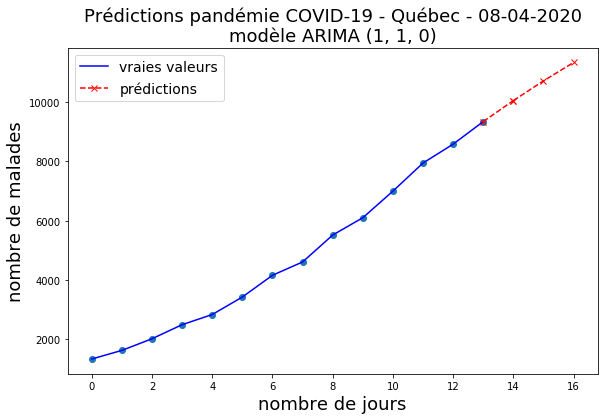

******************************************************************************************
Modèle ARIMA: (2, 1, 0)
Nombre de jours écoulés=26, t=0, prédiction=1331, vraie valeur=1342
Nombre de jours écoulés=27, t=1, prédiction=1619, vraie valeur=1632
Nombre de jours écoulés=28, t=2, prédiction=1882, vraie valeur=2024
Nombre de jours écoulés=29, t=3, prédiction=2383, vraie valeur=2498
Nombre de jours écoulés=30, t=4, prédiction=2948, vraie valeur=2840
Nombre de jours écoulés=31, t=5, prédiction=3154, vraie valeur=3430
Nombre de jours écoulés=32, t=6, prédiction=3941, vraie valeur=4162
Nombre de jours écoulés=33, t=7, prédiction=4870, vraie valeur=4611
Nombre de jours écoulés=34, t=8, prédiction=5060, vraie valeur=5518
Nombre de jours écoulés=35, t=9, prédiction=6175, vraie valeur=6101
Nombre de jours écoulés=36, t=10, prédiction=6848, vraie valeur=6997
Nombre de jours écoulés=37, t=11, prédiction=7680, vraie valeur=7944
Nombre de jours écoulés=38, t=12, prédiction=8849, vraie valeur=858

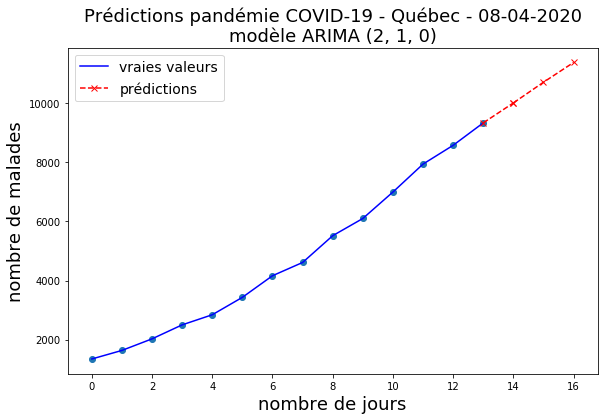

******************************************************************************************
Modèle ARIMA: (3, 1, 0)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Nombre de jours écoulés=26, t=0, prédiction=1766, vraie valeur=1342
Nombre de jours écoulés=27, t=1, prédiction=1586, vraie valeur=1632
Nombre de jours écoulés=28, t=2, prédiction=1872, vraie valeur=2024


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Nombre de jours écoulés=29, t=3, prédiction=2411, vraie valeur=2498
Nombre de jours écoulés=30, t=4, prédiction=2940, vraie valeur=2840
Nombre de jours écoulés=31, t=5, prédiction=3152, vraie valeur=3430
Nombre de jours écoulés=32, t=6, prédiction=3950, vraie valeur=4162
Nombre de jours écoulés=33, t=7, prédiction=4824, vraie valeur=4611
Nombre de jours écoulés=34, t=8, prédiction=5042, vraie valeur=5518
Nombre de jours écoulés=35, t=9, prédiction=6222, vraie valeur=6101
Nombre de jours écoulés=36, t=10, prédiction=6794, vraie valeur=6997
Nombre de jours écoulés=37, t=11, prédiction=7686, vraie valeur=7944
Nombre de jours écoulés=38, t=12, prédiction=8809, vraie valeur=8580
Nombre de jours écoulés=39, t=13, prédiction=9406, vraie valeur=9340
meilleur_ARIMA (3, 1, 0)
Nombre de jours écoulés=40, t=14, prédiction=10081
meilleur_ARIMA (3, 1, 0)
Nombre de jours écoulés=41, t=15, prédiction=10791
meilleur_ARIMA (3, 1, 0)
Nombre de jours écoulés=42, t=16, prédiction=11515
Test RMSE: 238.334


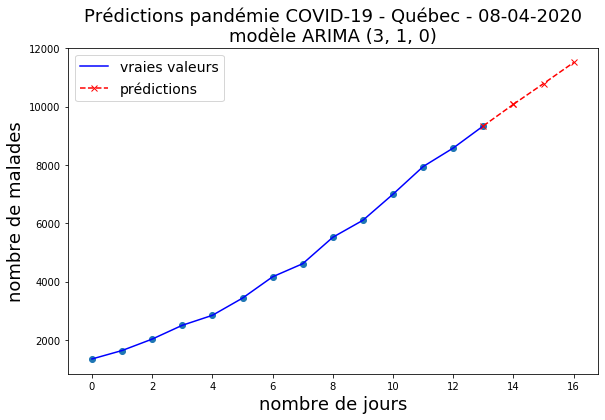

******************************************************************************************


In [169]:
from pandas import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from numpy.linalg import LinAlgError
from math import sqrt

X = series.values
X = [x for x in X if x > 0]

# Ici au besoin, on peut ajouter manuellement un nouveau point de données
# X += [3430]
taille_entrainement_data = int(len(X) * 0.66)
print("Taille du jeu de données de test=",len(X)-taille_entrainement_data)

# Séparation entre jeu de données d'entraînement et jeu de données de test
entrainement_data, test_data = X[0:taille_entrainement_data], X[taille_entrainement_data:len(X)]

predictions_ARIMA = {}
print("*"*90)

for meilleur_ARIMA in meilleurs_ARIMA:
    print("Modèle ARIMA:",meilleur_ARIMA)
    historique = [x for x in entrainement_data]
    predictions = list()
    nbr_predictions = 3
    nbr_jours_init = len(X)-len(test_data)

    for t in range(len(test_data)+nbr_predictions):
        modele_ARIMA = ARIMA(historique, order=meilleur_ARIMA)
        modele_ARIMA_entraine = modele_ARIMA.fit(disp=0)
        sortie = modele_ARIMA_entraine.forecast()
        une_prediction = sortie[0]
        predictions.append(une_prediction)
        if t < len(test_data):
            vraie_valeur = test_data[t]
            historique.append(vraie_valeur)
            print('Nombre de jours écoulés=%i, t=%i, prédiction=%i, vraie valeur=%i' % (nbr_jours_init+t,t,une_prediction,vraie_valeur))
        else:
            historique.append(une_prediction)
            print("meilleur_ARIMA",meilleur_ARIMA)
            etiq_ARIMA = "_".join([str(hyperparam) for hyperparam in meilleur_ARIMA])
            if not etiq_ARIMA in predictions_ARIMA.keys():
                predictions_ARIMA[etiq_ARIMA]=int(une_prediction)
            print('Nombre de jours écoulés=%i, t=%i, prédiction=%i' % (nbr_jours_init+t,t,une_prediction))

    # Évaluation de l'erreur de prédiction
    rmse = sqrt(mean_squared_error(test_data, predictions[:-nbr_predictions]))
    print('Test RMSE: %.3f' % rmse)
    # Afficher les vraies valeurs et les prédictions pour le jeu de données de test
    plt.figure(figsize=(longueur/2,hauteur/2))
    date = (dates_list[-1]+pd.Timedelta(days=1)).strftime("%d-%m-%Y")
    plt.title(u"Prédictions pandémie COVID-19 - Québec - " + date + "\n" + 
              "modèle ARIMA (" + etiq_ARIMA.replace("_",", ") + ")",fontsize=18)
    x_data = list(range(len(test_data)))
    x_data_extension = list(range(len(test_data)+nbr_predictions))[-nbr_predictions:]
    plt.scatter(x_data,test_data)
    plt.plot(test_data,color='blue',label="vraies valeurs")
    plt.plot(x_data_extension[-nbr_predictions:],
             predictions[-nbr_predictions:],
             "r--",marker="x",label="prédictions")
    point1 = [x_data[-1], test_data[-1]]
    point2 = [x_data_extension[0],int(predictions[-nbr_predictions])]
    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]
    plt.plot(x_values, y_values,"r--",marker="x")
    plt.legend(loc='best',fontsize=14)
    plt.xlabel("nombre de jours",fontsize=18)
    plt.ylabel("nombre de malades",fontsize=18)
    plt.show()
    print("*"*90)


## Modèle combiné 

Moyenne des prédictions des meilleurs modèles ARIMA plus une partie exponentielle issue d'un calcul de régression non linéaire. 

Pour les prédictions du 2 avril 20202, un seul modèle ARIMA (1,1,0) avait été retenu. Finalement les résultats du 3 avril semblent confirmer que le modèle combiné est plus réaliste, du moins à ce stade de l'épidémie au Québec.

In [170]:
# Composante du modèle exponentiel
ponderation_exp = 1.0
total_predictions = prediction_regNonLin_exp * ponderation_exp
#total_predictions = 0 
print("Prédictions régr. non-lin.: ",prediction_regNonLin_exp)
for etiq_ARIMA in predictions_ARIMA.keys():
    print("Prédictions ARIMA: (" + etiq_ARIMA.replace("_",", ") + ") : " + str(predictions_ARIMA[etiq_ARIMA]))
    total_predictions += predictions_ARIMA[etiq_ARIMA]
print("Prédictions pour "+(dates_list[-1]+pd.Timedelta(days=1)).strftime("%d-%m-%Y"))
# Modèle exponentiel utilisé avant le 1er avril 2020
# ligne commentée
prediction_modele_combine = int(total_predictions/(len(predictions_ARIMA)+1*ponderation_exp))
print(" => ",prediction_modele_combine," <= ")

Prédictions régr. non-lin.:  11592
Prédictions ARIMA: (1, 1, 0) : 10048
Prédictions ARIMA: (2, 1, 0) : 10015
Prédictions ARIMA: (3, 1, 0) : 10081
Prédictions pour 08-04-2020
 =>  10434  <= 


### Afficher les vraies valeurs et la prédiction pour demain

#### Modèle combiné: Melleurs ARIMA + régression non linéaire exp

[14, 15, 16]


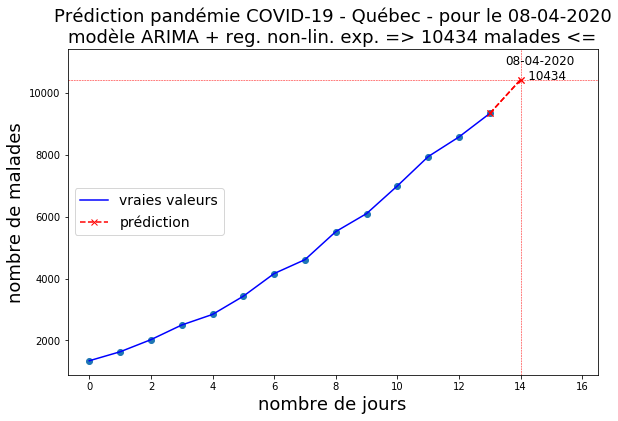

In [177]:
plt.figure(figsize=(longueur/2,hauteur/2))
date_demain = (dates_list[-1]+pd.Timedelta(days=1)).strftime("%d-%m-%Y")
# prediction_demain = int(total_predictions/(len(predictions_ARIMA))
prediction_demain = prediction_modele_combine
plt.title(u"Prédiction pandémie COVID-19 - Québec - pour le " + date_demain + "\n" + 
          "modèle ARIMA + reg. non-lin. exp. => " + str(prediction_demain) + " malades <=",fontsize=18)
x_data = list(range(len(test_data)))
x_data_extension = list(range(len(test_data)+nbr_predictions))[-nbr_predictions:]
print(x_data_extension)
plt.scatter(x_data,test_data)
plt.plot(test_data,color='blue',label="vraies valeurs")
point1 = [x_data[-1], test_data[-1]]
point2 = [x_data_extension[0],prediction_demain]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values,"r--",marker="x",label="prédiction")
plt.axhline(prediction_demain,linestyle='--',linewidth=0.5,color='r')
plt.axvline(x=point2[0],linestyle='--',linewidth=0.5,color='r')
plt.text(point2[0]-0.5, point2[1], date_demain + "\n" +" "*6 + str(prediction_demain),fontsize=12)
plt.plot(x_values, y_values,"r--",marker="x")
xlim(right=point2[0]+2.5)
ylim(top=point2[1]+1000)
plt.legend(loc='best',fontsize=14)
plt.xlabel("nombre de jours",fontsize=18)
plt.ylabel("nombre de malades",fontsize=18)
plt.savefig('images/Prediction-modele_combine-COVID19-Quebec.png')
plt.show()


#### Modèle meilleurs ARIMA seulement

In [172]:
# Composante du modèle exponentiel
ponderation_exp = 0
total_predictions = prediction_regNonLin_exp * ponderation_exp
#total_predictions = 0 
print("Prédictions régr. non-lin.: ",prediction_regNonLin_exp)
for etiq_ARIMA in predictions_ARIMA.keys():
    print("Prédictions ARIMA: (" + etiq_ARIMA.replace("_",", ") + ") : " + str(predictions_ARIMA[etiq_ARIMA]))
    total_predictions += predictions_ARIMA[etiq_ARIMA]
print("Prédictions pour "+(dates_list[-1]+pd.Timedelta(days=1)).strftime("%d-%m-%Y"))
# Modèle exponentiel utilisé avant le 1er avril 2020
# ligne commentée
prediction_pur_ARIMA = int(total_predictions/(len(predictions_ARIMA)+1*ponderation_exp))
print(" => ",prediction_pur_ARIMA," <= ")
#print(" => ",int(total_predictions/len(predictions_ARIMA))," <= ")


Prédictions régr. non-lin.:  11592
Prédictions ARIMA: (1, 1, 0) : 10048
Prédictions ARIMA: (2, 1, 0) : 10015
Prédictions ARIMA: (3, 1, 0) : 10081
Prédictions pour 08-04-2020
 =>  10048  <= 


### Afficher les vraies valeurs et la prédiction pour demain

#### Modèle meilleurs ARIMA

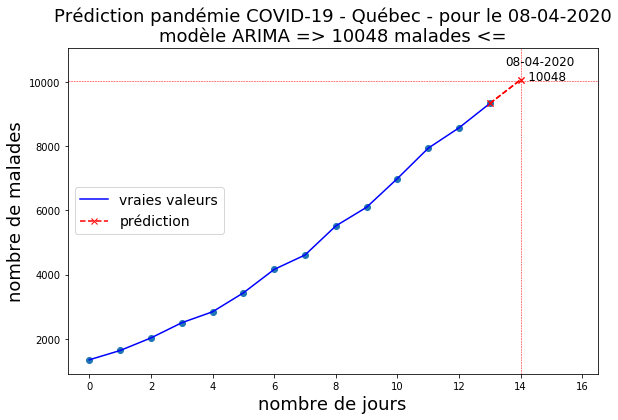

In [178]:
plt.figure(figsize=(longueur/2,hauteur/2))
date_demain = (dates_list[-1]+pd.Timedelta(days=1)).strftime("%d-%m-%Y")
prediction_demain = prediction_pur_ARIMA
plt.title(u"Prédiction pandémie COVID-19 - Québec - pour le " + date_demain + "\n" + 
          "modèle ARIMA => " + str(prediction_demain) + " malades <=",fontsize=18)
x_data = list(range(len(test_data)))
x_data_extension = list(range(len(test_data)+nbr_predictions))[-nbr_predictions:]
plt.scatter(x_data,test_data)
plt.plot(test_data,color='blue',label="vraies valeurs")
point1 = [x_data[-1], test_data[-1]]
point2 = [x_data_extension[0],int(predictions[-nbr_predictions])]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values,"r--",marker="x",label="prédiction")
plt.axhline(prediction_demain,linestyle='--',linewidth=0.5,color='r')
plt.axvline(x=point2[0],linestyle='--',linewidth=0.5,color='r')
plt.text(point2[0]-0.5, point2[1], date_demain + "\n" +" "*6 + str(prediction_demain),fontsize=12)
plt.plot(x_values, y_values,"r--",marker="x")
xlim(right=point2[0]+2.5)
ylim(top=point2[1]+1000)
plt.legend(loc='best',fontsize=14)
plt.xlabel("nombre de jours",fontsize=18)
plt.ylabel("nombre de malades",fontsize=18)
plt.savefig('images/Prediction-ARIMA_seul-COVID19-Quebec.png')
plt.show()


En observant le comportement de mes modèles depuis quelques jours, je suis tenté de faire une moyenne entre les résultats de mes deux principaux modèles, i.e. (modèle combiné + modèle pur ARIMA)/2

In [179]:
prediction_nouveau_modele = (prediction_modele_combine + prediction_pur_ARIMA)/2
print(" => ",prediction_nouveau_modele," <= ")


 =>  10241.0  <= 


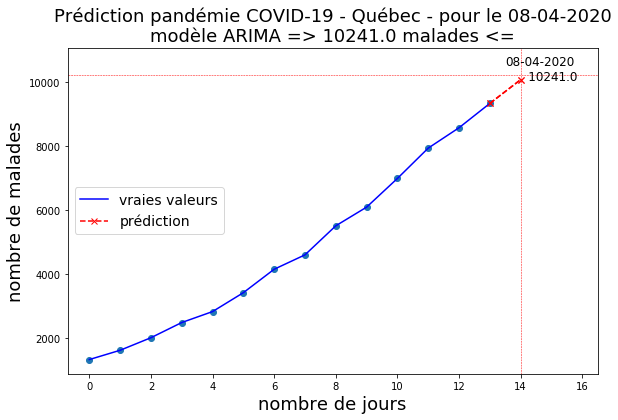

In [180]:
plt.figure(figsize=(longueur/2,hauteur/2))
date_demain = (dates_list[-1]+pd.Timedelta(days=1)).strftime("%d-%m-%Y")
prediction_demain = prediction_nouveau_modele
plt.title(u"Prédiction pandémie COVID-19 - Québec - pour le " + date_demain + "\n" + 
          "modèle ARIMA => " + str(prediction_demain) + " malades <=",fontsize=18)
x_data = list(range(len(test_data)))
x_data_extension = list(range(len(test_data)+nbr_predictions))[-nbr_predictions:]
plt.scatter(x_data,test_data)
plt.plot(test_data,color='blue',label="vraies valeurs")
point1 = [x_data[-1], test_data[-1]]
point2 = [x_data_extension[0],int(predictions[-nbr_predictions])]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values,"r--",marker="x",label="prédiction")
plt.axhline(prediction_demain,linestyle='--',linewidth=0.5,color='r')
plt.axvline(x=point2[0],linestyle='--',linewidth=0.5,color='r')
plt.text(point2[0]-0.5, point2[1], date_demain + "\n" +" "*6 + str(prediction_demain),fontsize=12)
plt.plot(x_values, y_values,"r--",marker="x")
xlim(right=point2[0]+2.5)
ylim(top=point2[1]+1000)
plt.legend(loc='best',fontsize=14)
plt.xlabel("nombre de jours",fontsize=18)
plt.ylabel("nombre de malades",fontsize=18)
plt.savefig('images/Prediction-nouveau_modele-COVID19-Quebec.png')
plt.show()

In [182]:
print("Fin du carnet web IPython")


Fin du carnet web IPython
